code Python utilisant la bibliothèque OpenCV pour lire une image, calculer son histogramme, étirer son histogramme, sauvegarder la nouvelle image et mesurer le contraste qualitativement et quantitativement :

Exercice 2 et 3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mesure de Michelson : 1.0
Mesure RMS : 0.5294437576044215


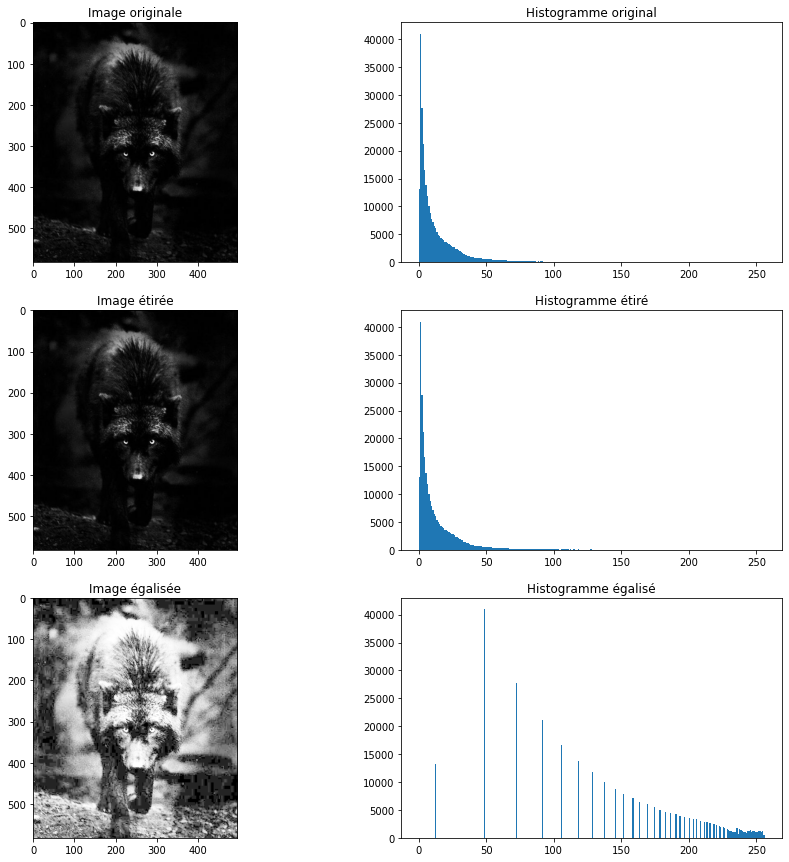

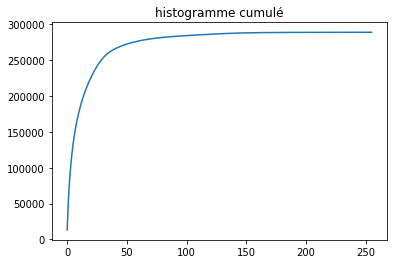

True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#Lecture de l'image en niveaux de gris
import cv2
img_path = '/content/drive/MyDrive/TP1_Hist-OptPxl/Loup-noir.jpg'

#Charger l'image
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

#Afficher l'image et son histogramme
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Image originale')
axs[0, 1].hist(img.ravel(),256,[0,256])
axs[0, 1].set_title('Histogramme original')

#Trouver les valeurs minimale et maximale de l'histogramme
min_val = np.min(img)
max_val = np.max(img)

#Étirer l'histogramme
a = 0
b = 255
img_stretched = (img - min_val) * ((b - a) / (max_val - min_val)) + a
img_stretched = np.clip(img_stretched, a, b).astype(np.uint8)

#Afficher l'image étirée et son histogramme
axs[1, 0].imshow(img_stretched, cmap='gray')
axs[1, 0].set_title('Image étirée')
axs[1, 1].hist(img_stretched.ravel(),256,[0,256])
axs[1, 1].set_title('Histogramme étiré')

#Calculer l'histogramme cumulé
hist_cum = np.cumsum(np.histogram(img_stretched, bins=256, range=(0, 255))[0])

#Égaliser l'histogramme
I_equalized = np.round((255 / img.size) * hist_cum[img_stretched]).astype(np.uint8)

axs[2,0].imshow(I_equalized, cmap='gray')
axs[2,0].set_title('Image égalisée')
axs[2,1].hist(I_equalized.ravel(),256,[0,256])
axs[2,1].set_title('Histogramme égalisé')

#Mesurer le contraste avec la mesure de Michelson
C_M = (np.max(img_stretched) - np.min(img_stretched)) / (np.max(img_stretched) + np.min(img_stretched))
print(f"Mesure de Michelson : {C_M}")

#Mesurer le contraste avec la mesure RMS
C_RMS = np.sqrt(np.mean(np.square(img_stretched))) / np.mean(img_stretched)
print(f"Mesure RMS : {C_RMS}")

# Création du graphique de l'histogramme cumulé
fig, ax = plt.subplots()
ax.plot(hist_cum)
ax.set_title('histogramme cumulé')

# Affichage du graphique
plt.show()
#Sauvegarder l'image étirée
cv2.imwrite('Loup-noir-stretched.jpg', img_stretched)